In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d blastchar/telco-customer-churn
import numpy as np

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 435MB/s]


In [2]:

import zipfile
zip_ref = zipfile.ZipFile('/content/telco-customer-churn.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.ticker as mtick

In [4]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0, 0.5, 'Count')

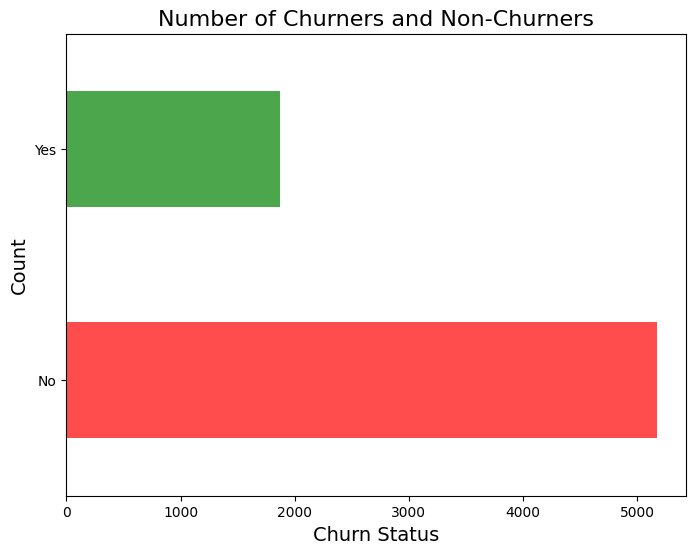

In [7]:
value_counts = data['Churn'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='barh', color=['red', 'green'], alpha=0.7)

# Add titles and labels
plt.title('Number of Churners and Non-Churners', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [8]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
data.dropna(how='any',inplace=True)

In [10]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)


In [12]:
data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [13]:
# Drop column customerID and tenure
data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [14]:
data.shape

(7032, 20)

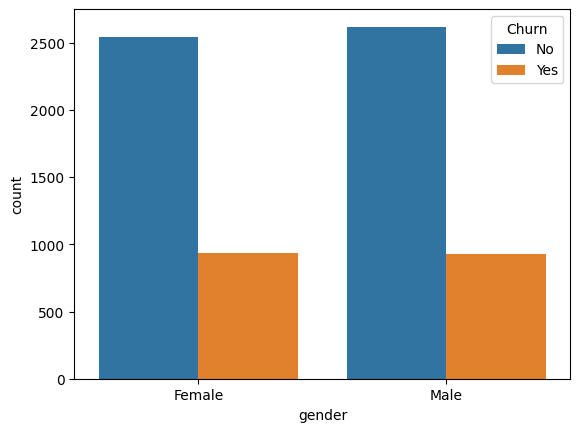

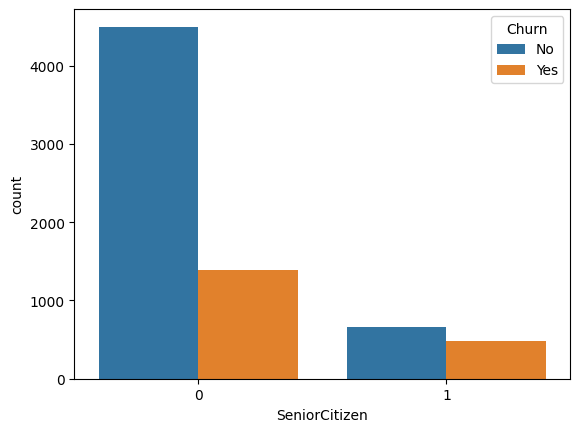

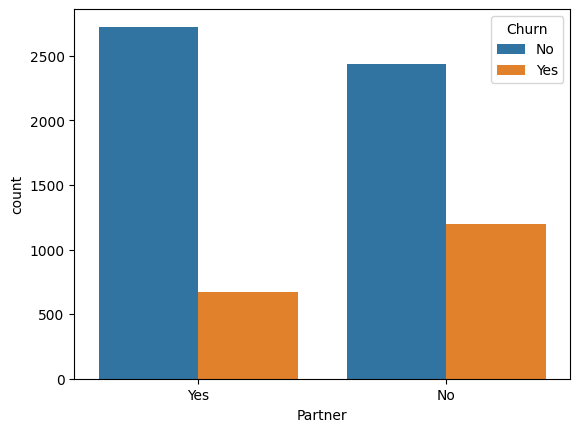

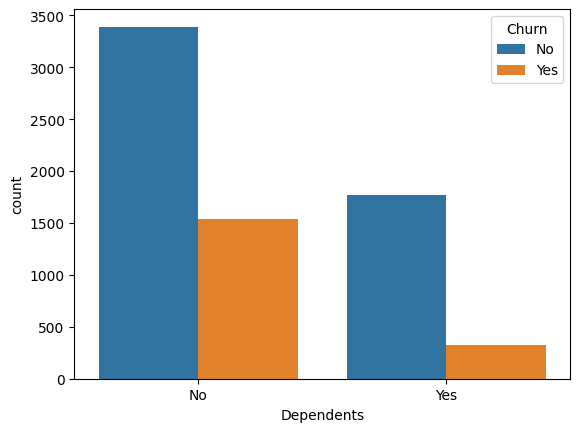

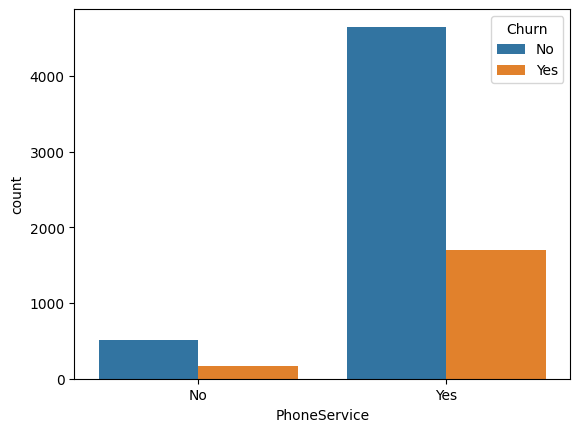

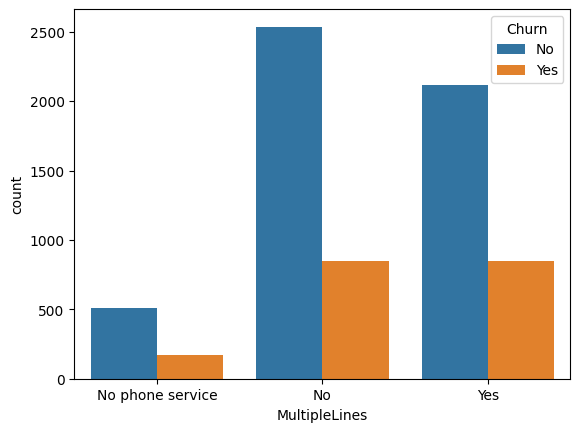

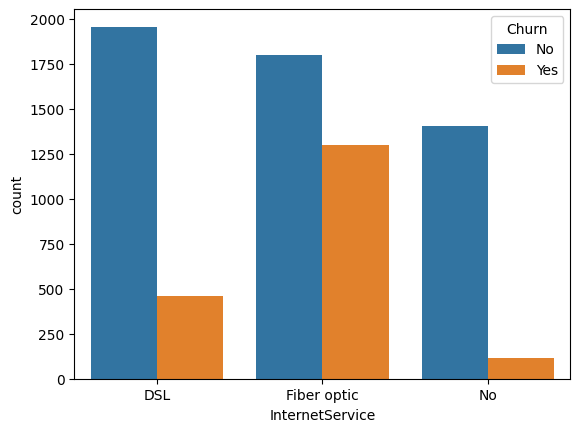

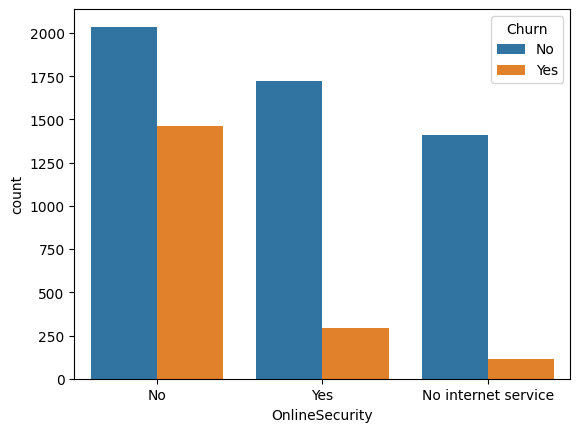

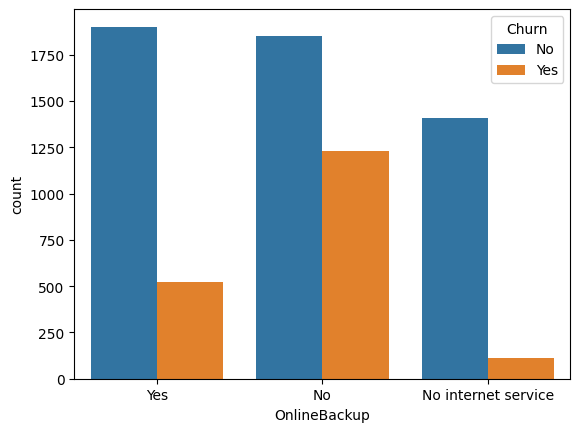

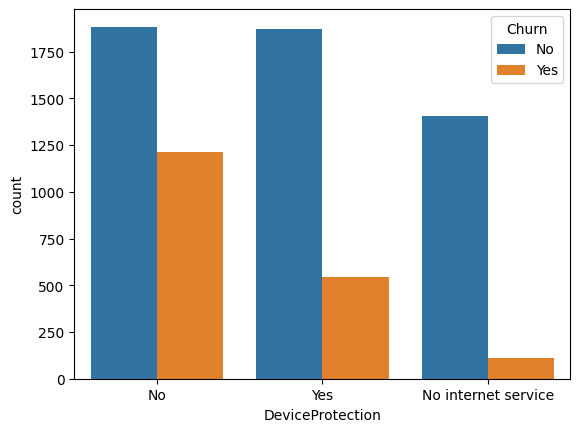

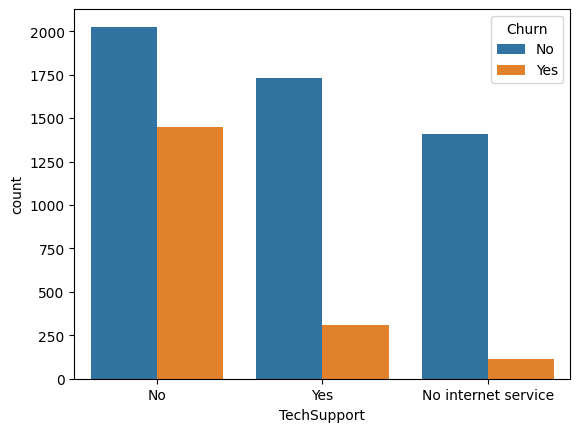

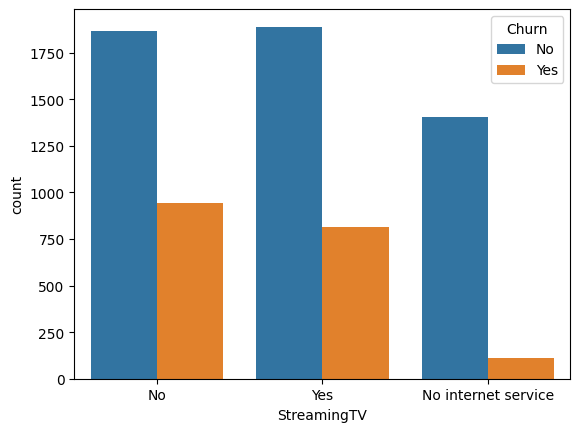

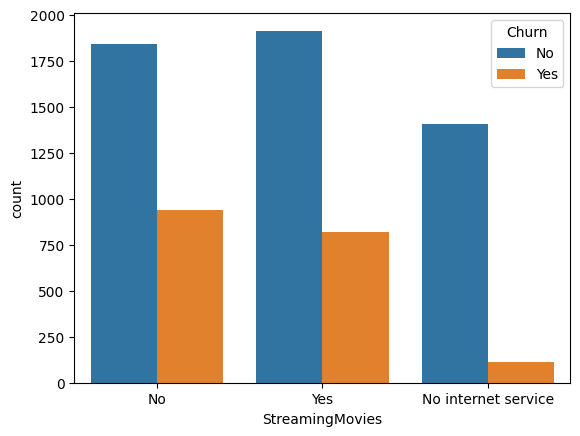

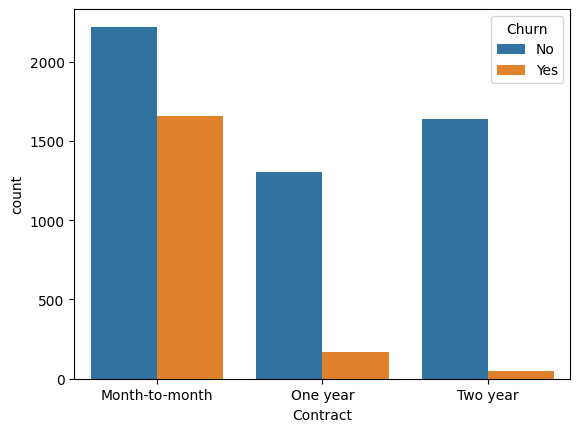

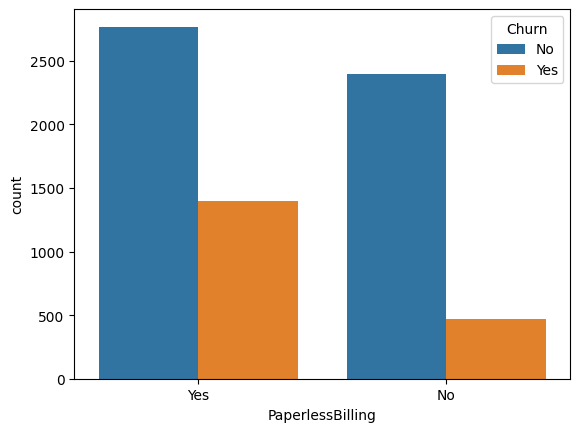

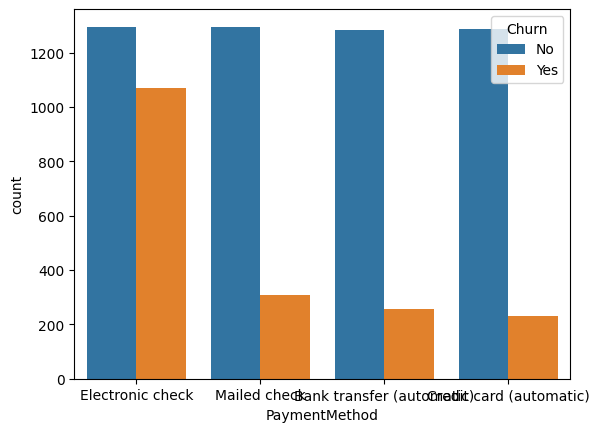

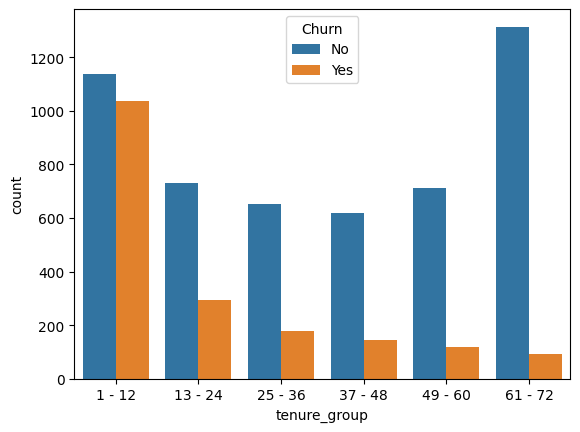

In [15]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')


In [16]:
data['Churn'] = np.where(data.Churn == 'Yes', 1, 0)


In [17]:
data_dummies = pd.get_dummies(data)
data_dummies = data_dummies.astype(int)  # Convert all columns to integers


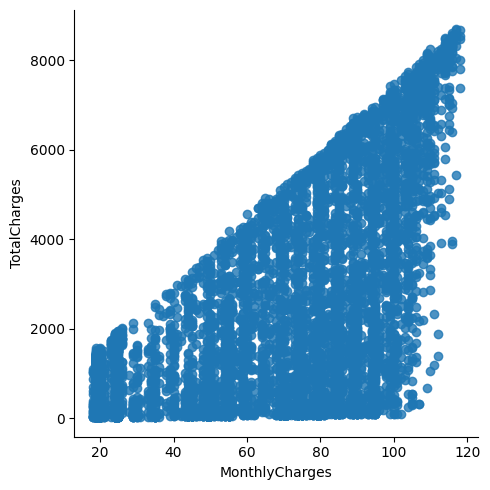

In [18]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=data_dummies,fit_reg=False)

<ipython-input-19-2910463864>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ], color="Red", shade = True)
<ipython-input-19-2910463864>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ], ax =Mth, color="Blue", shade = True)


Text(0.5, 1.0, 'Monthly charges by churn')

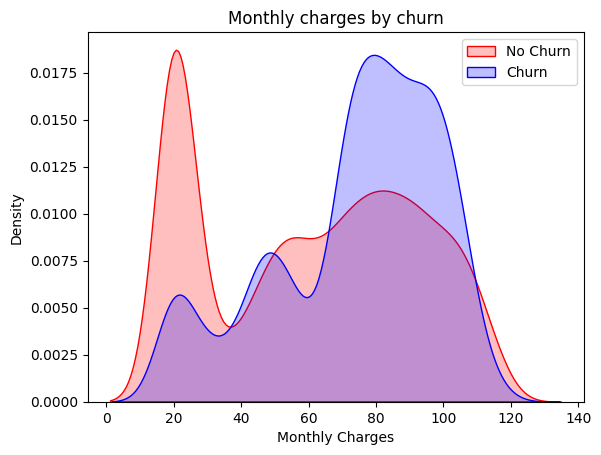

In [19]:
Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ], color="Red", shade = True)
Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ], ax =Mth, color="Blue", shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-20-4258594954>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ], color="Red", shade = True)
<ipython-input-20-4258594954>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ], ax =Mth, color="Blue", shade = True)


Text(0.5, 1.0, 'Monthly charges by churn')

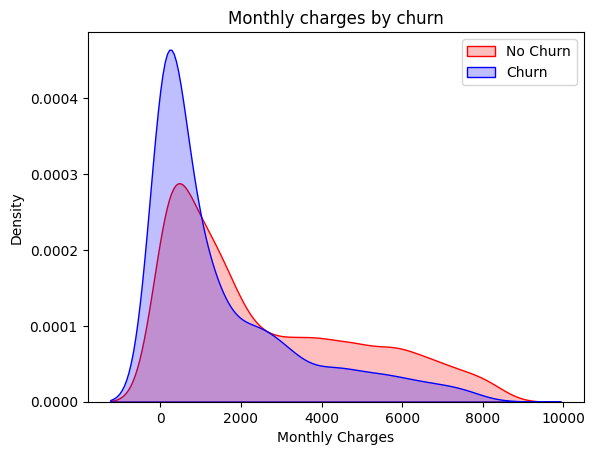

In [20]:
Mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ], color="Red", shade = True)
Mth=sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ], ax =Mth, color="Blue", shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

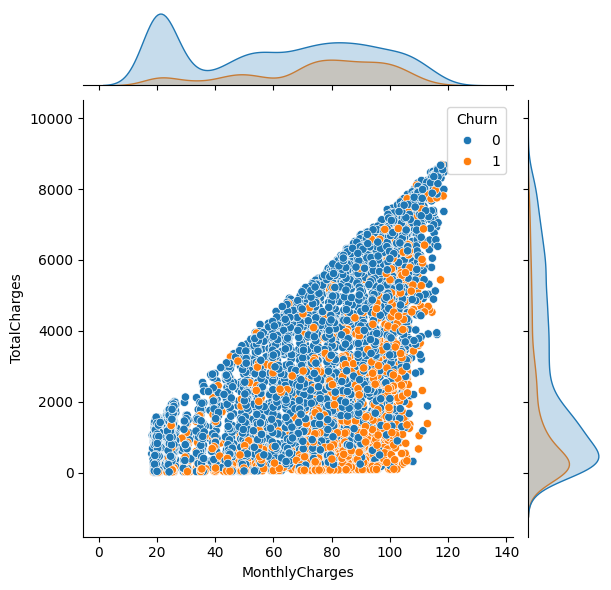

In [21]:
sns.jointplot(
    data=data,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    kind='scatter'
)
plt.show()


<Axes: >

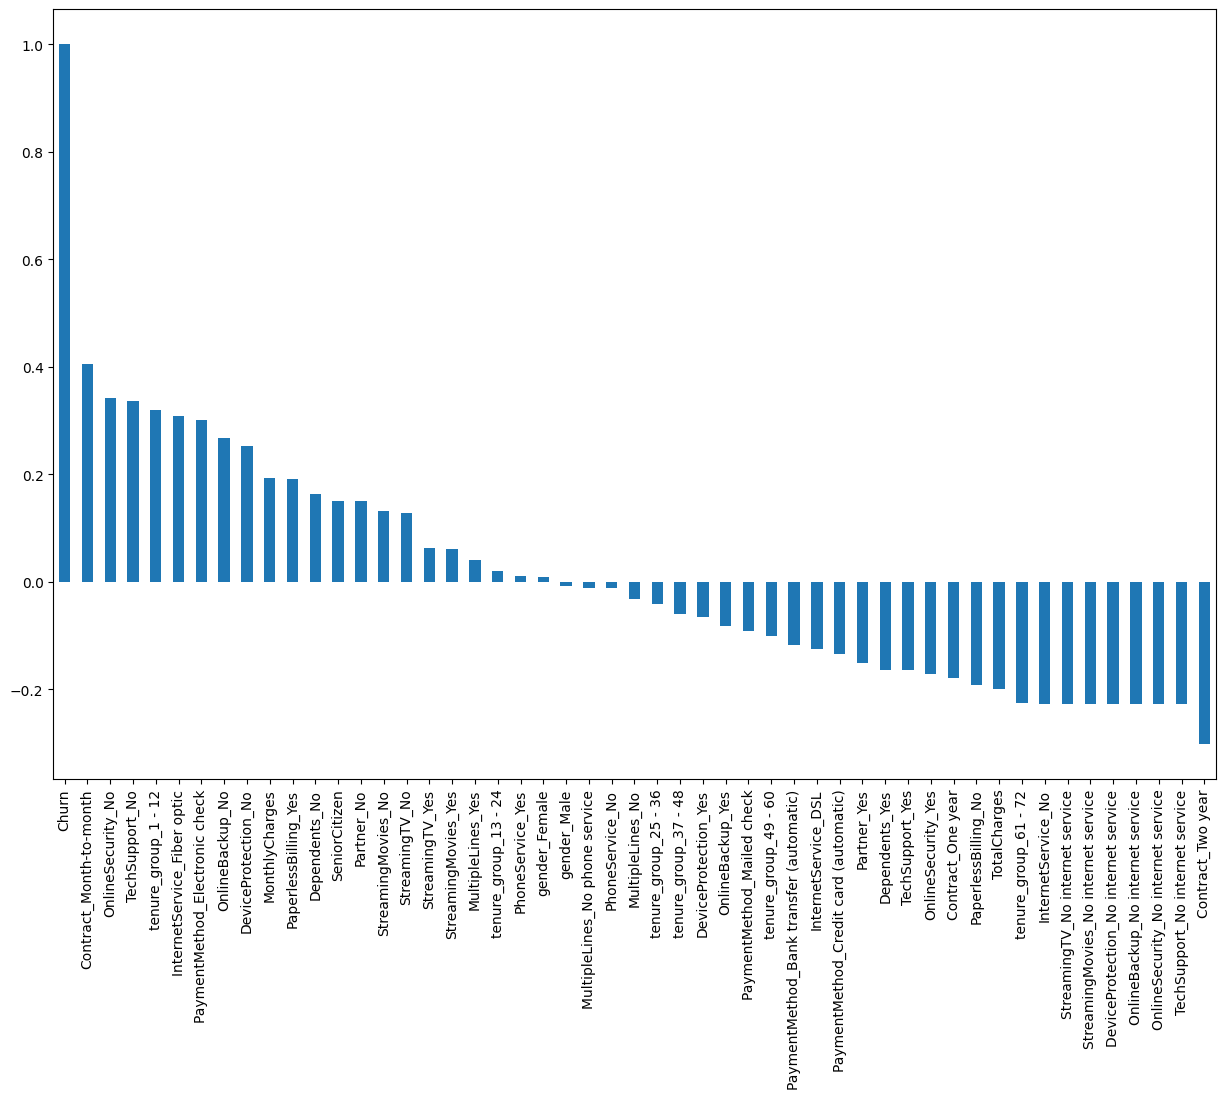

In [22]:
plt.figure(figsize=(15, 10))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [28]:
data_dummies.to_csv('tel_churn.csv')

In [29]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [30]:
df=pd.read_csv("/content/tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [31]:
df=df.drop('Unnamed: 0',axis=1)

In [32]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103,7362,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29,346,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74,306,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [33]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [36]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [37]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [38]:
model_dt.score(x_test,y_test)

0.7761194029850746

In [39]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1012
           1       0.63      0.48      0.55       395

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.78      0.77      1407



In [41]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [42]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [43]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [44]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9422413793103448
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       545
           1       0.93      0.97      0.95       615

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [47]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [48]:
y_pred=model_rf.predict(x_test)

In [49]:
model_rf.score(x_test,y_test)

0.7846481876332623

In [50]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1012
           1       0.71      0.40      0.51       395

    accuracy                           0.78      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.77      0.78      0.76      1407



In [52]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [53]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [54]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [55]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [56]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [57]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [58]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9344827586206896
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       555
           1       0.91      0.97      0.94       605

    accuracy                           0.93      1160
   macro avg       0.94      0.93      0.93      1160
weighted avg       0.94      0.93      0.93      1160



In [59]:
import pickle

In [60]:
filename = 'model.sav'

In [61]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [62]:
load_model = pickle.load(open(filename, 'rb'))

In [63]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [64]:
model_score_r1

0.9344827586206896